# MUSIC TAGS INSPYRER : 

### Introduction
This project is an exercise in the framework of DataScientest training. The idea is to use the signal characteristics of a music track (Fourier Transform, etc...) to automatically classify this track within 10 genres : blues, classical, country, disco, hiphop, jazz, metal, pop, reggae & rock. For this aim we used the dataset provided __[here](http://marsyas.info/)__, composed of 100 tracks for each style.
<br>A Kaggle on this topic does also exist (_[here](https://www.kaggle.com/insiyeah/musicfeatures?select=data.csv)_).

### Goal :
More precisely, the **goal** is first to classify musics within ten categories, thanks to a machine learning algorithm. 
<br> In a second time, we implemented tracks of recent music genres non-classified in the dataset, and looked at how they were influenced by the classified genres.



# I - A first exploration of the dataset

In what follows is presented a quick exploration of the dataset

## Importing the dataset

In [ ]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import statsmodels.api
%matplotlib inline

sns.set()

# Reading data
music_df = pd.read_csv('data.csv')

In [ ]:
#Characteristics of the data frame
print('Shape : ', music_df.shape)
music_df.head()

After this first look at the dataframe, we can note that:
<li> all the variables except "filename" and "label" are numerical, and represent characteristics of the signal
<li> the target variable is "label", which represents the music genre
    
<br> So we have a typical classification problem, and as we will see later on the dataset is balanced between the different musical genres

## Meaning of the variables
The following dictionary explains briefly the meaning of each column in the dataset.

In [3]:
explo_report = pd.read_excel('Exploration_report.xlsx')
d = {'Variable':explo_report.iloc[2:,1],'Description': explo_report.iloc[2:,3]}

description_df = pd.DataFrame(d)
description_df.set_index('Variable',inplace=True)
description_df.T

Variable,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,\tspectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
Description,name of the musical file,rythm at which the track is played,Basic rythmic unit in music,Short time Fourier transform,root mean squared error,Localization of the spectrum center of mass,Spectral bandwidth at mid-height,Steepness of a transmission function with freq...,Rate at which the signal changes from positive...,Mel-frequency cepstral coefficients,...,Mel-frequency cepstral coefficients,Mel-frequency cepstral coefficients,Mel-frequency cepstral coefficients,Mel-frequency cepstral coefficients,Mel-frequency cepstral coefficients,Mel-frequency cepstral coefficients,Mel-frequency cepstral coefficients,Mel-frequency cepstral coefficients,Mel-frequency cepstral coefficients,Musical genre of the sample


## Dataset characteristics

As one can see, in what follows the dataset is complete. There are no missing values.

In [4]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [5]:
# Classes of the target variable (label)
music_df["label"].value_counts(ascending = False)

pop          100
reggae       100
classical    100
country      100
metal        100
hiphop       100
blues        100
jazz         100
disco        100
rock         100
Name: label, dtype: int64

From the result below, we can see the classes (pop, reggae, disco,...,jazz, rock, hiphop) of the target variable (label) are well balanced.
We can say, that we are in a **balanced supervised classification problem**.

In [6]:
# Removing the filename column
print("The filename column is not useful for the machine learning algorithm. So we decide to remove it.")
music_df = music_df.drop(["filename"], axis = 1)

The filename column is not useful for the machine learning algorithm. So we decide to remove it.


In [7]:
# Variables description
music_df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


## Visualizing the distribution for each numerical feature

Here we will plot the distributions for each feature thanks to histograms.

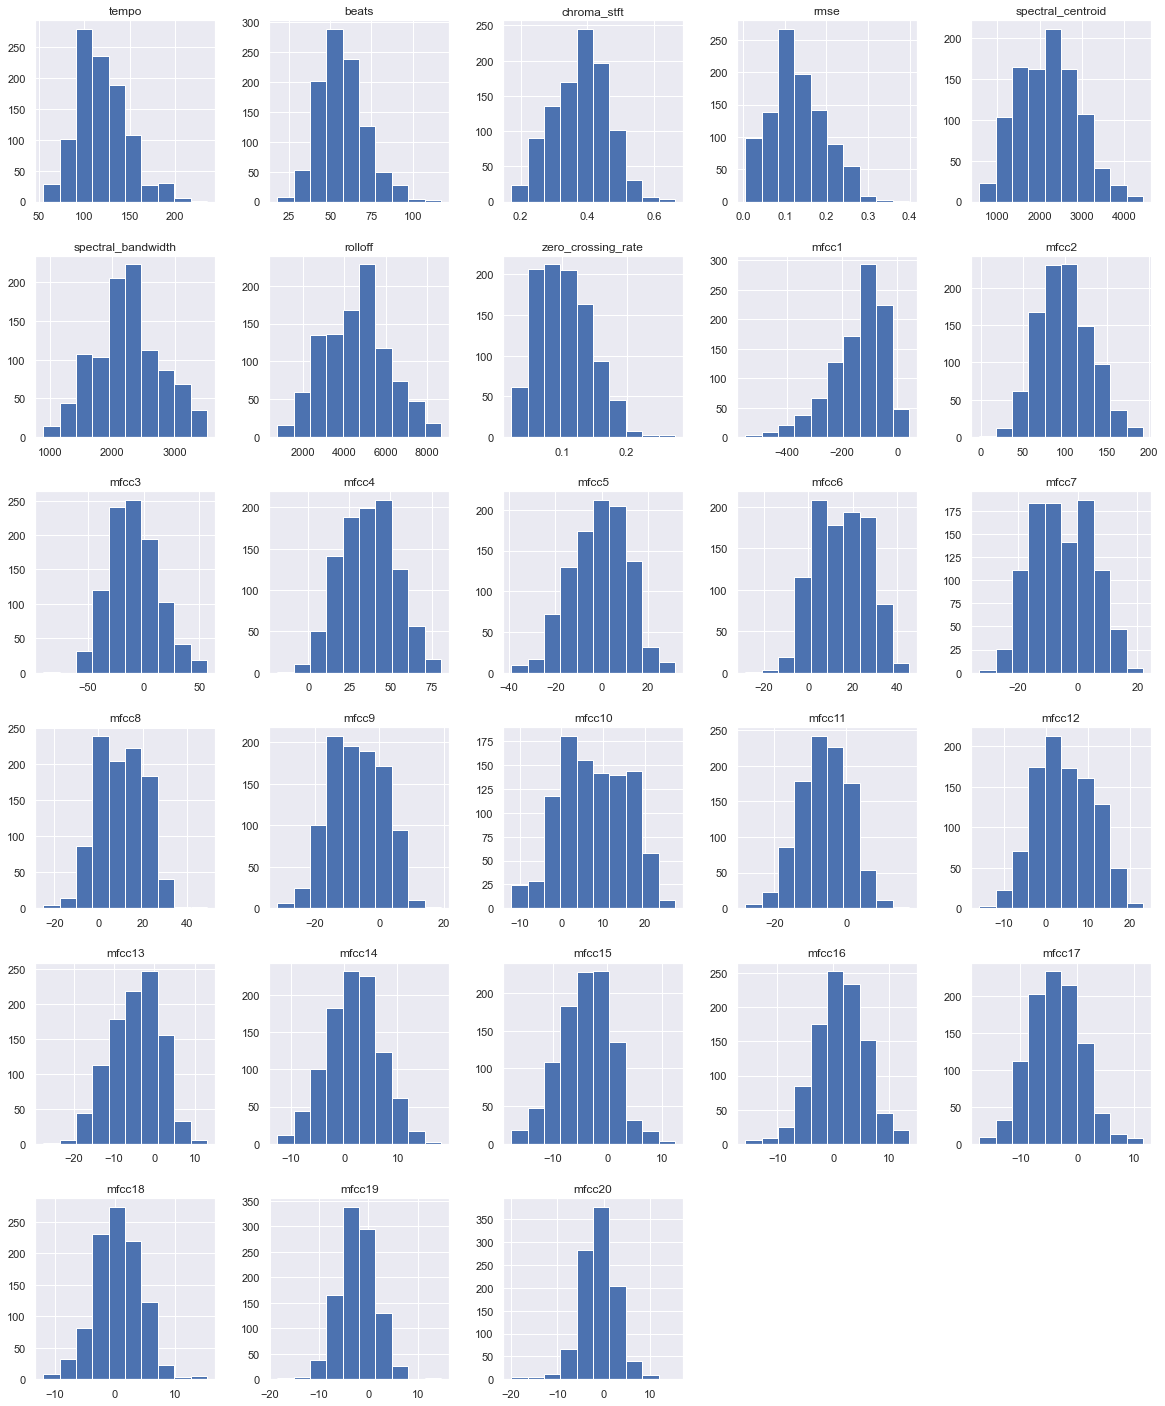

In [8]:
music_df.hist(figsize=(20,25));

## Distributions and outliers in each genre

C:\Users\paul_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


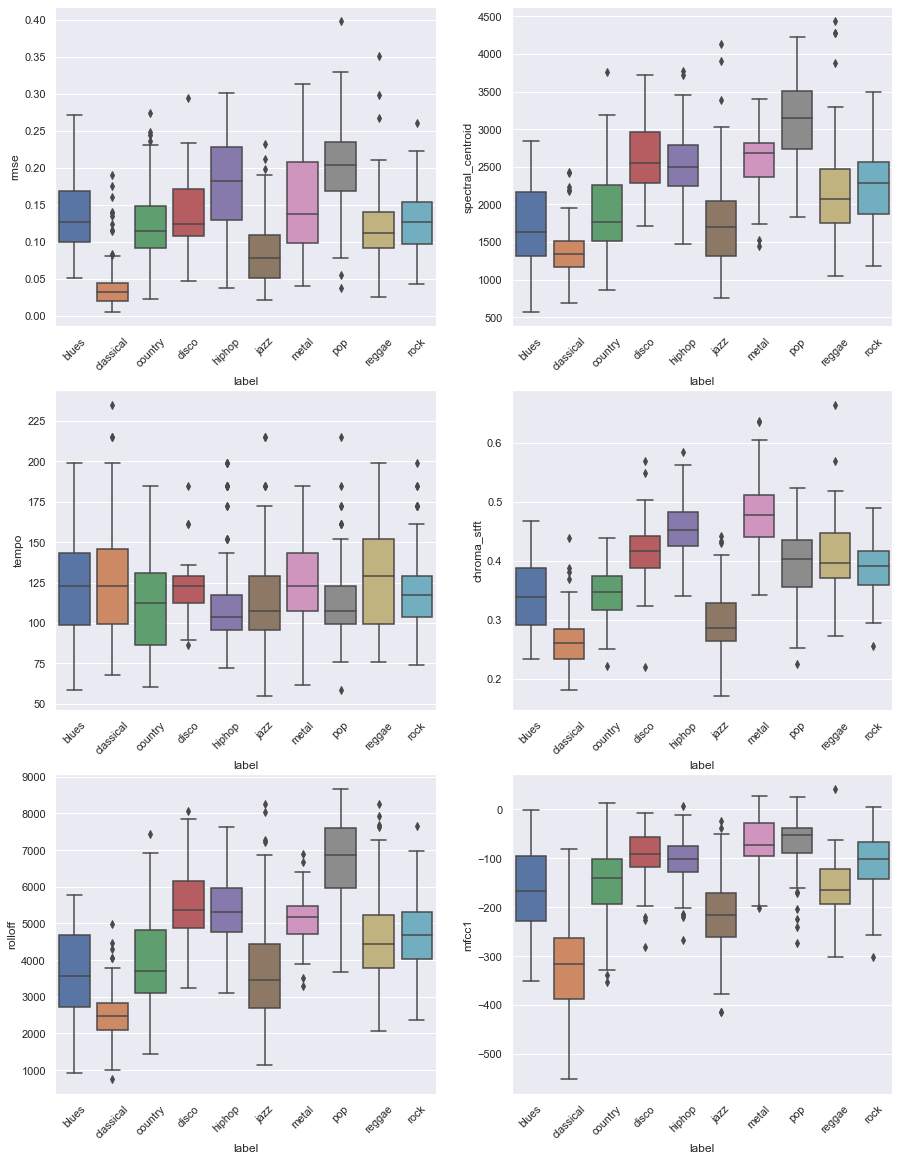

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

for i in range(3):
    for j in range(2):
        axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(),rotation=45)

sns.boxplot(x="label", y="rmse", data=music_df,ax=axes[0,0])
sns.boxplot(x="label", y="spectral_centroid", data=music_df,ax=axes[0,1])
sns.boxplot(x="label", y="tempo", data=music_df,ax=axes[1,0])
sns.boxplot(x="label", y="chroma_stft", data=music_df,ax=axes[1,1])
sns.boxplot(x="label", y="rolloff", data=music_df,ax=axes[2,0])
sns.boxplot(x="label", y="mfcc1", data=music_df,ax=axes[2,1]);


In these box plot, one can notice that the "classical" should be the easiest to classify, as its features are well separated from the other genres features.
The presence of outliers depends on the musical style. For some styles the variable has a wider range with no outlier, for others the range is short and there are outliers.

## Visualizing the correlations between variables

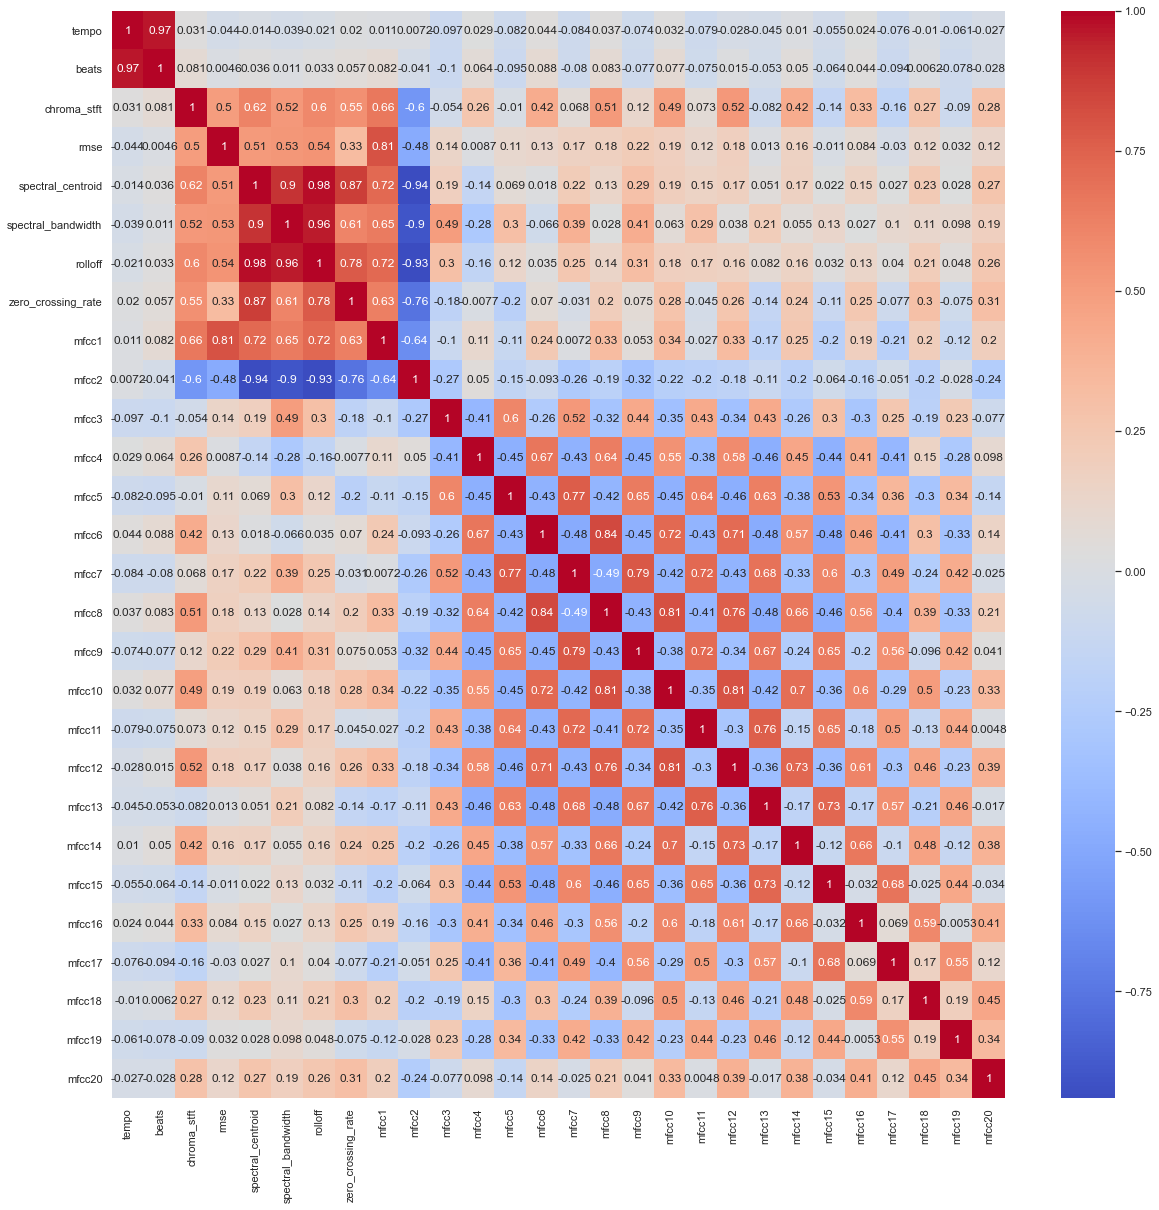

In [10]:
cor = music_df.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=cor, annot= True,ax=ax,cmap='coolwarm');

## Correlations with the target

In [11]:
# Correlation between the numeric variables and the target

# Function to calculate p-value ANOVA 
def anova_p_value (col,data_frame):
    result = statsmodels.formula.api.ols('col ~ label', data = data_frame).fit()
    table = statsmodels.api.stats.anova_lm(result)
    p_value_anova = table["PR(>F)"][0]
    return p_value_anova

# Evaluation of p-value ANOVA
num_music_df = music_df.select_dtypes(['number'])
label_features = list(num_music_df.keys())
coeff_tab =[]
for col in num_music_df.columns:
    coef = anova_p_value(num_music_df[col],music_df)
    coeff_tab.append(coef)

# Creating a DataFrame with the lists label_features and coeff_tab
df = pd.DataFrame(list(zip(label_features, coeff_tab)), 
               columns =['Variables', 'P-Value ANOVA'])

In [12]:
# Interval of P-Value ANOVA
print("p-value maximum :",df["P-Value ANOVA"].max())

p-value maximum : 1.9015906206586574e-05


As the p-value is always below 5%, one can conclude that the music genre as a dependency on each feature.

In [88]:
target = music_df.label
data = music_df.drop('label',axis=1)

# II - Preparing the features and target

## Suppressing the highly correlated features

In [15]:
# Import libraries
from  sklearn.model_selection  import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [16]:
# Function to remove highly correlated columns

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [17]:
# Removing the columns 

correlation(data, 0.85)
print(data.columns)

Index(['tempo', 'chroma_stft', 'rmse', 'spectral_centroid', 'mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')


Although the distributions of many variables are not totally symetric, we can see that the median doesn't bring much additional information to the mean. So the suppression of highly correlated features only keeps one of them for each feature.

There are no missing values in our data set, so no other treatment is needed.

## Target column encoding

In [18]:
# Encode the label classes using LabelEncoder
encoder = preprocessing.LabelEncoder()
target = encoder.fit_transform(target)

## Separation between train and test sets

As our dataset is not very large, we've decided to use cross-validation to chose the hyperparameters of our models and a test set to check if there is overfitting or not.

In [19]:
# Split for the train and test datasets
X_train, X_test, y_train, y_test = train_test_split (data, target,
                                                    test_size = 0.2 ,
                                                    random_state = 42 ,
                                                    stratify = target)

In [20]:
# Scale the X data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# III - Modelisation

We implemented several machine learning algorithm for classification, the results obtained for each model are summarized in the following table. The detailed studies for each model are presented in appendix.

|| [Logistic Regression](#logistic_regression) |[Decision Tree](#decision_tree) | [SVM](#svm) | [KNN](#KNN) | [Random Forest](#random_forest) | [Naive Bayes](#naive_bayes) | [Stochastic Gradient Descent](#stochastic_gradient_descent) | [MLP](#mlp) | [Adaboost](#adaboost) | [XGboost](#xgboost) | [Dense neural network](#dnn) | [CNN](#cnn) | [Voting classifier](#voting_classifier) |
|:-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|**accuracy** | 0.69 | 0.51 | 0.69 | 0.68 | 0.71 | 0.48 | 0.62 | 0.71 | 0.69 | 0.71 | 0.67 |0.51|0.71|
|**f1-score** | 0.69 | 0.49 | 0.69 | 0.65 | 0.70 | 0.46 | 0.60 | 0.70 | 0.65 | 0.70 | 0.66 |0.42|0.70|


The best results were obtained, with an accuracy around **0.71**, thanks to the Random Forest, XGboost, and the Multi Layer Perceptron (MLP). In order to improve those results, we also tried to extract new features using librosa (see [appendix 1](#adding_features)), however no real improvement was observed. Finally, we implemented a CNN algorithm directly on the raw music files whose results were not as good as the MLP (see [appendix 3](#cnn_raw)); however a fine tuning of this model could be a good track to follow to improve the accuracy in music genre classification.
<br>Hereafter, is presented the optimization procedure for the hyperparameters of the MLP. In the last section, we apply the MLP model on songs not in the data set. 

<a id='mlp'></a>
## Tuning of the Artificial Neural Network (MLP) with a GridSearchCV

For this part throughout the end of the process of training the selected model, saving it and trying it on new songs we'll use the augmented dataset "datasetB" extracted in the appendix1 further below. For chronology reasons, we need to paste here the reading and processing of this new data before going on, so that the code can be executed correctly.   

In [ ]:
# Reading data
music_df = pd.read_csv("dataB.csv")

# Removing the filename column
print("The filename column is not useful for the machine learning algorithm. So we decide to remove it.")
music_df = music_df.drop(["filename"], axis = 1)

target = music_df.label
data = music_df.drop('label',axis=1)

# Function to remove highly correlated columns

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    
# Removing the columns 
correlation(data, 0.85)

# Encode the label classes using LabelEncoder
encoder = preprocessing.LabelEncoder()
target = encoder.fit_transform(target)

# Split for the train and test datasets
X_train, X_test, y_train, y_test = train_test_split (data, target,
                                                    test_size = 0.2 ,
                                                    random_state = 42 ,
                                                    stratify = target)

# Scale the X data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
# Creation of the classifier ann  (MLPClassifier)
mlp = MLPClassifier(max_iter = 1000)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

grid_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
grid_mlp.fit(X_train, y_train)  


C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=1000,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alph

In [26]:
grid_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [19]:
# Prediction using ann on X_test

y_pred_mlp = grid_mlp.predict(X_test)

pd.crosstab(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_mlp), 
            rownames = ['Real class'], colnames=['Predicted class']) 

Predicted class,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Real class,,,,,,,,,,
blues,15,0,0,0,0,0,1,0,2,2
classical,0,20,0,0,0,0,0,0,0,0
country,2,0,14,0,0,1,0,0,2,1
disco,0,1,0,10,3,0,1,2,1,2
hiphop,0,0,0,0,16,0,1,0,3,0
jazz,2,1,2,0,0,15,0,0,0,0
metal,2,0,0,0,0,1,17,0,0,0
pop,0,0,0,2,1,0,0,14,3,0
reggae,0,0,2,1,2,0,0,0,15,0


In [20]:
print(classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_mlp)))

              precision    recall  f1-score   support

       blues       0.68      0.75      0.71        20
   classical       0.91      1.00      0.95        20
     country       0.56      0.70      0.62        20
       disco       0.71      0.50      0.59        20
      hiphop       0.73      0.80      0.76        20
        jazz       0.88      0.75      0.81        20
       metal       0.81      0.85      0.83        20
         pop       0.82      0.70      0.76        20
      reggae       0.52      0.75      0.61        20
        rock       0.55      0.30      0.39        20

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.70       200
weighted avg       0.72      0.71      0.70       200



## Saving the best model (MLPClassifier)

We can see that this latest model is the best, so we are going to save it for further utilization. Before saving, we train it again on the whole data (X_train + X_test) to benefit from a maximum of data.
It's important to note that in such a classification a score close to 100% would never be possible as there are "artistical intersections" between these styles. For instance there is country-rock music, so it's no surprise to get 7 rock songs classified as country music.

In [30]:
# Creation of the classifier ann  (MLPClassifier)
ann_final = MLPClassifier(max_iter = 1000, activation = 'tanh', alpha = 0.0001, hidden_layer_sizes = (100,),
                   learning_rate = 'constant', solver = 'adam') 
# Fit of ann on (X_train,y_train)
ann_final.fit(data, target)
# Sauvegarde du modèle

from joblib import dump, load

dump(ann_final, 'md.joblib')

['md.joblib']

# IV - Testing the best model

As the MLP classifier obtained the best accuracy, we selected this model. In this part is exposed, a test of this model two new audio files, and the predictions of our model on those new tracks will be discussed in this section.

### A gothic rock song

Here is a first trial with a recent gothik rock song. It will be interesting to see if it is correctly classified...

In [80]:
import librosa
import csv

# 1. Get the file path to an included audio example

songname = "Drab Majesty - Kissing The Ground.wav"


# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
 
y, sr = librosa.load(songname, mono = True, duration=30)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
rmse = librosa.feature.rms(y=y)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
to_append = f'{tempo} {np.mean(chroma_stft)} {np.std(chroma_stft)} {np.median(chroma_stft)} \
                {np.mean(rmse)} {np.std(rmse)} {np.median(rmse)} {np.mean(spec_cent)} {np.std(spec_cent)} \
                {np.median(spec_cent)} {np.mean(spec_bw)} {np.std(spec_bw)} {np.median(spec_bw)} \
                {np.mean(rolloff)} {np.std(rolloff)} {np.median(rolloff)} {np.mean(zcr)} {np.std(zcr)} \
                {np.median(zcr)}'    
for e in mfcc:
            to_append += f' {np.mean(e)}'

X_song = pd.DataFrame(to_append.split())            

In [49]:
header = 'tempo chroma_stft_mean chroma_stft_std chroma_stft_median rmse_mean rmse_std rmse_median \
          spectral_centroid_mean spectral_centroid_std spectral_centroid_median spectral_bandwidth_mean \
          spectral_bandwidth_std spectral_bandwidth_median rolloff_mean rolloff_std rolloff_median zero_crossing_rate_mean \
          zero_crossing_rate_std zero_crossing_rate_median'
for i in range(1, 21):
    header += f' mfcc{i}'
header = header.split()

list

In [5]:
# Formatting the music data in the same way as the dataset used to build the model
X_song_array = np.array([to_append.split()]) 
X_song = pd.DataFrame(X_song_array, columns = header)
X_song = X_song[['tempo', 'chroma_stft_mean', 'chroma_stft_std', 'rmse_mean', 'rmse_std',
       'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_bandwidth_std', 'zero_crossing_rate_std',
       'zero_crossing_rate_median', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20']]

In [84]:
# Retrieving the saved model
loaded_model = load('md.joblib')

# Classification of the music by the model
genre_pred = loaded_model.predict(X_song)
pred = encoder.inverse_transform(genre_pred)

pred

array(['rock'], dtype=object)

The song is correctly classified in the "rock" category.

### A classical piece of piano

Let's now try the classification on a classical piece of piano:

In [10]:
# 1. Get the file path to an included audio example

songname = "Bach - Le clavier bien tempéré.wav"


# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
 
y, sr = librosa.load(songname, mono = True, duration=30)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
rmse = librosa.feature.rms(y=y)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
to_append = f'{tempo} {np.mean(chroma_stft)} {np.std(chroma_stft)} {np.median(chroma_stft)} \
                {np.mean(rmse)} {np.std(rmse)} {np.median(rmse)} {np.mean(spec_cent)} {np.std(spec_cent)} \
                {np.median(spec_cent)} {np.mean(spec_bw)} {np.std(spec_bw)} {np.median(spec_bw)} \
                {np.mean(rolloff)} {np.std(rolloff)} {np.median(rolloff)} {np.mean(zcr)} {np.std(zcr)} \
                {np.median(zcr)}'    
for e in mfcc:
            to_append += f' {np.mean(e)}'

X_song = pd.DataFrame(to_append.split())          

header = 'tempo chroma_stft_mean chroma_stft_std chroma_stft_median rmse_mean rmse_std rmse_median \
          spectral_centroid_mean spectral_centroid_std spectral_centroid_median spectral_bandwidth_mean \
          spectral_bandwidth_std spectral_bandwidth_median rolloff_mean rolloff_std rolloff_median zero_crossing_rate_mean \
          zero_crossing_rate_std zero_crossing_rate_median'
for i in range(1, 21):
    header += f' mfcc{i}'
header = header.split()
type(header)

list

In [11]:
# Formatting the music data in the same way as the dataset used to build the model
X_song_array = np.array([to_append.split()]) 
X_song = pd.DataFrame(X_song_array, columns = header)
X_song = X_song[['tempo', 'chroma_stft_mean', 'chroma_stft_std', 'rmse_mean', 'rmse_std',
       'spectral_centroid_mean', 'spectral_centroid_std',
       'spectral_bandwidth_std', 'zero_crossing_rate_std',
       'zero_crossing_rate_median', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
       'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11',
       'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18',
       'mfcc19', 'mfcc20']]

In [12]:
loaded_model = load('md.joblib')
genre_pred = loaded_model.predict(X_song)
pred = encoder.inverse_transform(genre_pred)
pred

array(['classical'], dtype=object)

We see that our musical example has been correctly classified again.
Instead of displaying only the predicted class, we could also display the probability found for each genre:

In [13]:
probs = loaded_model.predict_proba(X_song)
probs

array([[2.20718535e-03, 9.82851108e-01, 1.04279508e-03, 1.00213120e-05,
        4.35865649e-05, 1.35107094e-02, 1.21910000e-05, 2.04430563e-05,
        1.55765995e-04, 1.46193950e-04]])

Let's display this in a more interpretable way:

In [33]:
for i, proba in enumerate(probs[0]):
    print((encoder.inverse_transform([i]))[0], ":", proba)
      

blues : 0.002207185354582714
classical : 0.98285110833584
country : 0.0010427950757036944
disco : 1.0021312023861223e-05
hiphop : 4.358656486266863e-05
jazz : 0.013510709355783313
metal : 1.2191000022811584e-05
pop : 2.044305630689271e-05
reggae : 0.0001557659952521539
rock : 0.0001461939496218912


These probabilities could be used in another perspective than strict classification, for instance if we wanted to submit musics not belonging to any of these 10 genres and see if we can track influences of these initial genres on other more recent genres.

# Conclusion

The goal of this study was to automatically classify music tracks thanks to a machine learning algorithm, using a dataset composed of characteristic features of 1000 music tracks equally partionned within 10 genres : hip hop, blues, classic... We tested several machine learning alogorithms. The best accuracy, of 0.71, was obtained thanks to a Multi Layer Perceptron (MLP) algorithm (similar accuracies were also obtained using XGboost and Random Forest). The trained MLP model was tested on two music tracks not in the data set, and successfully identified their music genre.
<br>
Improving the accuracy of the classification model would probably require to tackle the problem in a different manner. Indeed, the maximum accuracy using this data set seems to be limited. Therefore, in order to go further we tried 2 approaches which would require further developments :
* Adding new features to the data set thanks to the librosa library ([appendix 1](#adding_features))
* Using a convolutionnal neural network on the raw music files ([appendix3](#cnn_raw))

<a id='adding_features'></a>
# Appendix 1 : Addition of new features thanks to librosa

The measures used for the features are extracted 12 times during the 30 seconds of each sound file. In the dataset initially provided, these 12 measures are summarized by their mean only. In a first step we have tried and tuned many different models on this dataset.
In a second phase, we wanted to see if a supplement of information provided by some additional features such as the standard deviation and median of the variables could enhance the accuracy of our predictions. Although, as it will be found below, the enhanced dataset doesn't improve the performance, we publish here only the comparisons of models made with the new dataset in order to reduce the size of this notebook. In some cases the models have been tested on the initial dataset because of the segmentation of the work between the members of the team. We consider that the results are equivalent on both datasets anyway. 

In [2]:
import librosa
import csv
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# generating a dataset
header = 'filename tempo chroma_stft_mean chroma_stft_std chroma_stft_median rmse_mean rmse_std rmse_median \
          spectral_centroid_mean spectral_centroid_std spectral_centroid_median spectral_bandwidth_mean \
          spectral_bandwidth_std spectral_bandwidth_median rolloff_mean rolloff_std rolloff_median zero_crossing_rate_mean \
          zero_crossing_rate_std zero_crossing_rate_median'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

file = open('dataB.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'./genres/{g}'):
        songname = f'./genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {tempo} {np.mean(chroma_stft)} {np.std(chroma_stft)} {np.median(chroma_stft)} \
                      {np.mean(rmse)} {np.std(rmse)} {np.median(rmse)} {np.mean(spec_cent)} {np.std(spec_cent)} \
                      {np.median(spec_cent)} {np.mean(spec_bw)} {np.std(spec_bw)} {np.median(spec_bw)} \
                      {np.mean(rolloff)} {np.std(rolloff)} {np.median(rolloff)} {np.mean(zcr)} {np.std(zcr)} \
                      {np.median(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataB.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
            

In [2]:
# Reading data
music_df_ext = pd.read_csv("dataB.csv")
music_df_ext.head()

,filename,tempo,chroma_stft_mean,chroma_stft_std,chroma_stft_median,rmse_mean,rmse_std,rmse_median,spectral_centroid_mean,spectral_centroid_std,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,123.046875,0.349943,0.297926,0.254129,0.130225,0.053187,0.126158,1784.420446,360.263361,...,8.810669,-3.667368,5.751691,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,67.999589,0.340983,0.308190,0.232455,0.095918,0.048718,0.093785,1529.835316,613.175361,...,5.376803,-2.239120,4.216963,-6.012273,0.936109,-0.716537,0.293876,-0.287431,0.531573,blues
2,blues.00002.wav,161.499023,0.363603,0.292039,0.275578,0.175573,0.052423,0.174122,1552.481958,395.634070,...,5.789265,-8.905224,-1.083720,-9.218359,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,63.024009,0.404779,0.306609,0.319878,0.141191,0.079617,0.128953,1070.119953,429.532791,...,6.087677,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637982,-0.619690,-3.408233,blues
4,blues.00004.wav,135.999178,0.308590,0.296395,0.201488,0.091563,0.047996,0.082990,1835.494603,585.961468,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


# Appendix 2 : Tested classification algorithms

<a id='logistic_regression'></a>
## Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

# Creation of the clasifier lr  (LogisticRegression)
lr = LogisticRegression(max_iter = 1000, multi_class='auto')

# Parameters on which to train the lr model
parametres_lr = {'C' : [10**i for i in range(-2,5,1)],
                 'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

# Creation of the grid to train the lr model
grid_lr = model_selection.GridSearchCV(lr, param_grid=parametres_lr,cv=10)

In [12]:
# Training of the grid_lr on X_train and y_train
grille = grid_lr.fit(X_train,y_train)


C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Arthur\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Conve

In [13]:
from time import time
t0 = time()

# Prediction using lr on X_test
y_pred_lr = grid_lr.predict(X_test)

# Calcul du temps de prédiction du modèle
t1 = time() - t0  
print("Réalisé en {} secondes".format(round(t1,3)))


Réalisé en 0.025 secondes


In [15]:
pd.crosstab(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_lr), rownames = ['Real class'], 
            colnames=['Predicted class'])

Predicted class,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Real class,,,,,,,,,,
blues,13,0,1,1,0,1,1,0,2,1
classical,0,19,0,0,0,1,0,0,0,0
country,2,0,13,0,0,2,0,0,1,2
disco,0,1,0,10,4,0,0,2,1,2
hiphop,0,0,0,0,14,1,1,1,3,0
jazz,2,1,0,1,0,16,0,0,0,0
metal,1,0,0,0,2,0,17,0,0,0
pop,0,0,0,2,0,0,0,16,2,0
reggae,0,0,2,0,1,0,0,1,16,0


In [16]:
print(classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_lr))) 

              precision    recall  f1-score   support

       blues       0.68      0.65      0.67        20
   classical       0.90      0.95      0.93        20
     country       0.57      0.65      0.60        20
       disco       0.56      0.50      0.53        20
      hiphop       0.67      0.70      0.68        20
        jazz       0.76      0.80      0.78        20
       metal       0.89      0.85      0.87        20
         pop       0.80      0.80      0.80        20
      reggae       0.57      0.80      0.67        20
        rock       0.50      0.25      0.33        20

    accuracy                           0.69       200
   macro avg       0.69      0.70      0.69       200
weighted avg       0.69      0.69      0.69       200



As there is a uniform distribution across the ten different classes, we'll base our evaluation of the models mostly on
the accuracy, and on the f1-score.

In [17]:
grid_lr.best_params_

{'C': 1, 'solver': 'newton-cg'}

<a id='decision_tree'></a>
## Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
# Creation of the clasifier dt (DecisionTreeClassifier)
dt = DecisionTreeClassifier()
# Fit of dt on (X_train,y_train)
dt.fit(X_train, y_train)

Réalisé en 0.056 secondes


In [24]:
# Prediction using dt on X_test
t0 = time()
y_pred_dt = dt.predict(X_test)
# Calcul du temps de prédiction du modèle
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))


Réalisé en 0.001 secondes


In [25]:
pd.crosstab(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_dt), 
            rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Real class,,,,,,,,,,
blues,8,0,4,0,1,2,0,0,3,2
classical,0,14,2,0,0,3,0,0,0,1
country,3,3,3,1,0,1,0,2,5,2
disco,0,0,4,5,2,2,2,1,1,3
hiphop,0,0,0,4,12,0,0,2,2,0
jazz,1,2,5,0,0,11,0,0,0,1
metal,0,0,0,4,2,1,12,0,0,1
pop,0,0,0,1,3,1,0,13,2,0
reggae,0,1,0,2,1,0,0,1,12,3


In [27]:
print(classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_dt)))

              precision    recall  f1-score   support

       blues       0.57      0.40      0.47        20
   classical       0.70      0.70      0.70        20
     country       0.14      0.15      0.15        20
       disco       0.25      0.25      0.25        20
      hiphop       0.55      0.60      0.57        20
        jazz       0.52      0.55      0.54        20
       metal       0.86      0.60      0.71        20
         pop       0.65      0.65      0.65        20
      reggae       0.44      0.60      0.51        20
        rock       0.38      0.40      0.39        20

    accuracy                           0.49       200
   macro avg       0.51      0.49      0.49       200
weighted avg       0.51      0.49      0.49       200



<a id='svm'></a>
## SVM

In [28]:
from sklearn import svm

# Creation of a SVM classifier
clf = svm.SVC()

# Parameters to test
parametres = {'C' : [0.1,1,10], 'kernel':['rbf', 'linear','poly'],'gamma' : [0.001, 0.1, 0.5]}

# Creation of the grid to test the SVM model
grid_clf = model_selection.GridSearchCV(clf, param_grid=parametres,cv=5)

In [29]:
# Training of the grid_svm on X_train and y_train

grille_svm = grid_clf.fit(X_train,y_train)

In [30]:
# Prediction using grid_clf on X_test
t0 = time()
y_pred_svm = grid_clf.predict(X_test)
# Calcul du temps de prédiction du modèle
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.019 secondes


In [31]:
pd.crosstab(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_svm), 
            rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Real class,,,,,,,,,,
blues,16,0,2,0,0,0,0,0,1,1
classical,0,20,0,0,0,0,0,0,0,0
country,1,0,15,0,0,2,0,1,0,1
disco,0,1,1,8,5,0,0,2,0,3
hiphop,0,0,0,1,17,0,0,1,1,0
jazz,1,1,1,0,0,16,0,0,1,0
metal,3,0,0,1,2,0,13,0,1,0
pop,0,0,0,1,4,0,0,12,3,0
reggae,0,0,3,0,5,0,0,1,11,0


In [32]:
print(classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_svm)))

              precision    recall  f1-score   support

       blues       0.70      0.80      0.74        20
   classical       0.87      1.00      0.93        20
     country       0.65      0.75      0.70        20
       disco       0.67      0.40      0.50        20
      hiphop       0.52      0.85      0.64        20
        jazz       0.84      0.80      0.82        20
       metal       1.00      0.65      0.79        20
         pop       0.67      0.60      0.63        20
      reggae       0.55      0.55      0.55        20
        rock       0.69      0.55      0.61        20

    accuracy                           0.69       200
   macro avg       0.71      0.69      0.69       200
weighted avg       0.71      0.69      0.69       200



In [33]:
grid_clf.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

<a id='knn'></a>
## KNN

In [34]:
from sklearn import neighbors

# Creation of a KNN classifier
knn = neighbors.KNeighborsClassifier()

# Parameters to test
parametres_knn = {'n_neighbors' : [1,2,5,10,20,50,100], 'metric':['minkowski', 'manhattan']}

# Creation of the grid to test the KNN model
grid_knn = model_selection.GridSearchCV(knn, param_grid=parametres_knn,cv=10)

In [35]:
# Training of the grid_knn on X_train and y_train
grille_knn = grid_knn.fit(X_train,y_train)

In [36]:
# Prediction using grid_knn on X_test
t0 = time()
y_pred_knn = grid_knn.predict(X_test)
# Calcul du temps de prédiction du modèle
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.074 secondes


In [37]:
pd.crosstab(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_knn), 
            rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Real class,,,,,,,,,,
blues,15,0,2,0,0,0,0,0,3,0
classical,0,20,0,0,0,0,0,0,0,0
country,0,1,16,0,0,1,0,1,0,1
disco,0,1,1,10,4,0,0,2,1,1
hiphop,2,0,1,1,12,0,0,3,0,1
jazz,1,2,3,1,0,12,0,0,1,0
metal,5,0,0,0,1,0,13,0,0,1
pop,0,0,2,1,2,0,0,15,0,0
reggae,0,1,1,2,3,0,0,2,9,2


In [38]:
print(classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_knn)))

              precision    recall  f1-score   support

       blues       0.62      0.75      0.68        20
   classical       0.80      1.00      0.89        20
     country       0.53      0.80      0.64        20
       disco       0.53      0.50      0.51        20
      hiphop       0.55      0.60      0.57        20
        jazz       0.92      0.60      0.73        20
       metal       1.00      0.65      0.79        20
         pop       0.65      0.75      0.70        20
      reggae       0.56      0.45      0.50        20
        rock       0.60      0.45      0.51        20

    accuracy                           0.66       200
   macro avg       0.68      0.66      0.65       200
weighted avg       0.68      0.66      0.65       200



In [39]:
grid_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

<a id='random_forest'></a>
## Random Forest

In [42]:
from sklearn import ensemble

# Creation of a RF classifier
RF = ensemble.RandomForestClassifier(n_jobs = -1, random_state = 321)

# Parameters to test
parametres_RF = {'n_estimators' : [10,20,100,200,500], 'criterion':['gini', 'entropy']}

# Creation of the grid to test the KNN model 
grid_RF = model_selection.GridSearchCV(RF, param_grid=parametres_RF,cv=5)

In [43]:
# Training of the grid_RF on X_train and y_train
grille_RF = grid_RF.fit(X_train,y_train)

In [44]:
# Prediction using grid_RF on X_test
t0 = time()
y_pred_RF = grid_RF.predict(X_test)
# Calcul du temps de prédiction du modèle
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.306 secondes


In [45]:
pd.crosstab(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_RF), 
            rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Real class,,,,,,,,,,
blues,14,0,1,1,0,1,0,0,3,0
classical,0,20,0,0,0,0,0,0,0,0
country,1,0,14,0,0,4,0,0,0,1
disco,0,0,1,8,5,1,2,2,1,0
hiphop,1,0,0,1,13,0,2,2,1,0
jazz,0,1,0,0,0,18,0,0,0,1
metal,2,0,0,1,1,0,16,0,0,0
pop,0,0,0,1,0,0,0,18,1,0
reggae,0,0,2,0,4,1,0,1,12,0


In [47]:
print(classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_RF))) 

              precision    recall  f1-score   support

       blues       0.67      0.70      0.68        20
   classical       0.95      1.00      0.98        20
     country       0.67      0.70      0.68        20
       disco       0.62      0.40      0.48        20
      hiphop       0.54      0.65      0.59        20
        jazz       0.69      0.90      0.78        20
       metal       0.80      0.80      0.80        20
         pop       0.75      0.90      0.82        20
      reggae       0.63      0.60      0.62        20
        rock       0.82      0.45      0.58        20

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.71      0.70       200



<a id='naive_bayes'></a>
## Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB
# Creation of the clasifier gnb (GaussianNaivesBayes)
gnb = GaussianNB()
# Fit of gnb on (X_train,y_train)
gnb.fit(X_train, y_train)
# Prediction using gnb on X_test
t0 = time()
y_pred_gnb = gnb.predict(X_test)
# Calcul du temps de prédiction du modèle
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.004 secondes


In [50]:
pd.crosstab(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_gnb), 
            rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Real class,,,,,,,,,,
blues,4,0,1,1,0,5,5,0,3,1
classical,0,18,0,0,0,2,0,0,0,0
country,1,0,9,0,1,4,0,2,0,3
disco,0,0,1,1,4,1,4,6,1,2
hiphop,1,0,0,2,4,0,4,7,2,0
jazz,1,2,0,0,0,12,0,3,2,0
metal,0,0,0,1,0,0,17,0,0,2
pop,0,0,0,0,1,0,0,18,1,0
reggae,0,0,3,0,1,1,1,2,10,2


In [51]:
print(classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_gnb))) 

              precision    recall  f1-score   support

       blues       0.57      0.20      0.30        20
   classical       0.90      0.90      0.90        20
     country       0.56      0.45      0.50        20
       disco       0.20      0.05      0.08        20
      hiphop       0.36      0.20      0.26        20
        jazz       0.46      0.60      0.52        20
       metal       0.47      0.85      0.61        20
         pop       0.45      0.90      0.60        20
      reggae       0.43      0.50      0.47        20
        rock       0.38      0.30      0.33        20

    accuracy                           0.49       200
   macro avg       0.48      0.49      0.46       200
weighted avg       0.48      0.49      0.46       200



In [48]:
grid_RF.best_params_

{'criterion': 'gini', 'n_estimators': 500}

<a id='voting_classifier'></a>
## Voting classifier

In [67]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm


clf1 = KNeighborsClassifier(n_neighbors=5,metric='manhattan')
clf2 = RandomForestClassifier(random_state= 123,criterion='gini', n_estimators=500)
clf3 = LogisticRegression(max_iter=1000, multi_class='auto', C=1, solver='newton-cg')
clf4 = svm.SVC(C=10, gamma=0.1, kernel='rbf')
clf5 = MLPClassifier(max_iter = 2000, activation='tanh', alpha=0.0001, hidden_layer_sizes= (100,),
                     learning_rate= 'constant', solver='adam')

vclf = VotingClassifier(estimators=[('knn', clf1), ('rf', clf2),('lr', clf3),('svc',clf4),('mlp',clf5)],  voting='hard')

In [68]:
vclf.fit(X_train,y_train)
y_pred = vclf.predict(X_test)

pd.crosstab(y_test,y_pred)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,15,0,1,0,1,0,2,0,0,1
1,0,18,1,0,1,0,0,0,0,0
2,0,0,15,0,0,1,0,1,0,3
3,1,0,0,13,1,0,1,0,0,4
4,0,0,0,3,13,0,0,2,2,0
5,0,2,3,1,0,13,0,1,0,0
6,1,0,0,0,2,0,17,0,0,0
7,0,0,2,3,0,0,0,15,0,0
8,0,1,1,1,4,1,0,1,11,0


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.86      0.90      0.88        20
           2       0.65      0.75      0.70        20
           3       0.50      0.65      0.57        20
           4       0.59      0.65      0.62        20
           5       0.76      0.65      0.70        20
           6       0.85      0.85      0.85        20
           7       0.75      0.75      0.75        20
           8       0.73      0.55      0.63        20
           9       0.56      0.50      0.53        20

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



<a id='stochastic_gradient_descent'></a>
## Stochastic Gradient Descent

In [52]:
from sklearn.linear_model import SGDClassifier
# Creation of the clasifier sgdc (StohasticGradientDescentClassifier)
sgdc = SGDClassifier()
# Fit of sgdc on (X_train,y_train)
sgdc.fit(X_train, y_train)
# Prediction using sgdc on X_val
t0 = time()
y_pred_sgdc = sgdc.predict(X_test)
# Calcul du temps de prédiction du modèle
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.003 secondes


In [53]:
pd.crosstab(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_sgdc), 
            rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Real class,,,,,,,,,,
blues,13,0,4,0,0,1,1,0,1,0
classical,0,18,2,0,0,0,0,0,0,0
country,2,0,14,0,0,2,0,0,0,2
disco,0,1,0,7,5,1,2,2,1,1
hiphop,0,0,1,0,12,2,2,1,2,0
jazz,2,1,6,0,0,9,0,0,1,1
metal,0,0,0,0,3,0,17,0,0,0
pop,0,0,1,3,1,0,0,14,1,0
reggae,0,0,2,0,1,0,0,1,14,2


In [54]:
print(classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_sgdc))) 

              precision    recall  f1-score   support

       blues       0.62      0.65      0.63        20
   classical       0.90      0.90      0.90        20
     country       0.38      0.70      0.49        20
       disco       0.70      0.35      0.47        20
      hiphop       0.52      0.60      0.56        20
        jazz       0.56      0.45      0.50        20
       metal       0.74      0.85      0.79        20
         pop       0.78      0.70      0.74        20
      reggae       0.64      0.70      0.67        20
        rock       0.40      0.20      0.27        20

    accuracy                           0.61       200
   macro avg       0.62      0.61      0.60       200
weighted avg       0.62      0.61      0.60       200



<a id='artificial_neural_network'></a>
## Artificial Neural Network

In [55]:
from sklearn.neural_network import MLPClassifier
# Creation of the clasifier ann  (MLPClassifier)
ann = MLPClassifier(max_iter = 1000)
# Fit of ann on (X_train,y_train)
ann.fit(X_train, y_train)
# Prediction using ann on X_test
t0 = time()
y_pred_ann = ann.predict(X_test)
# Calcul du temps de prédiction du modèle
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.002 secondes


In [56]:
pd.crosstab(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_ann), 
            rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Real class,,,,,,,,,,
blues,11,0,2,0,0,1,1,0,2,3
classical,0,19,0,0,0,1,0,0,0,0
country,2,0,15,1,0,0,0,0,2,0
disco,0,1,0,9,3,0,1,1,2,3
hiphop,0,0,1,0,16,0,0,1,2,0
jazz,1,1,2,0,0,15,0,0,1,0
metal,4,0,0,0,1,1,14,0,0,0
pop,0,0,1,3,1,0,0,12,3,0
reggae,0,0,2,1,3,0,0,0,13,1


In [57]:
print(classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_ann))) 

              precision    recall  f1-score   support

       blues       0.58      0.55      0.56        20
   classical       0.90      0.95      0.93        20
     country       0.58      0.75      0.65        20
       disco       0.60      0.45      0.51        20
      hiphop       0.62      0.80      0.70        20
        jazz       0.75      0.75      0.75        20
       metal       0.88      0.70      0.78        20
         pop       0.80      0.60      0.69        20
      reggae       0.48      0.65      0.55        20
        rock       0.53      0.40      0.46        20

    accuracy                           0.66       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.67      0.66      0.66       200



<a id='adaboost'></a>
## Algorithme de boosting AdaBoost avec Arbres de décision

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Creation of the decision tree classifier dtc  
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
from sklearn.ensemble import AdaBoostClassifier

# Creation of the clasifier ac  (AdaBoost Classifier)
ac = AdaBoostClassifier(base_estimator = dtc, n_estimators = 400)
# Training of the model
ac.fit(X_train,y_train)
ac.score(X_test,y_test)

0.65

In [61]:
# Prediction using ac on X_val
t0 = time()
y_pred_ac = ac.predict(X_test)
# Calcul du temps de prédiction du modèle
t1 = time() - t0
print("Réalisé en {} secondes".format(round(t1,3)))

Réalisé en 0.277 secondes


In [62]:
pd.crosstab(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_ac), 
            rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
Real class,,,,,,,,,,
blues,10,0,2,1,0,2,0,0,2,3
classical,0,12,0,0,0,8,0,0,0,0
country,0,0,19,0,0,0,0,0,0,1
disco,0,0,2,9,4,1,0,1,1,2
hiphop,0,0,0,3,13,0,1,1,1,1
jazz,0,1,3,0,0,15,0,0,0,1
metal,1,0,0,1,0,0,13,0,1,4
pop,0,0,0,2,2,0,0,12,4,0
reggae,0,0,3,1,1,0,0,1,14,0


In [63]:
print(classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(y_pred_ac)))  

              precision    recall  f1-score   support

       blues       0.83      0.50      0.62        20
   classical       0.92      0.60      0.73        20
     country       0.58      0.95      0.72        20
       disco       0.53      0.45      0.49        20
      hiphop       0.65      0.65      0.65        20
        jazz       0.58      0.75      0.65        20
       metal       0.93      0.65      0.76        20
         pop       0.80      0.60      0.69        20
      reggae       0.56      0.70      0.62        20
        rock       0.52      0.65      0.58        20

    accuracy                           0.65       200
   macro avg       0.69      0.65      0.65       200
weighted avg       0.69      0.65      0.65       200



<a id='xgboost'></a>
## XGboost

In [71]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=600, objective='multi:softmax',booster='gbtree', colsample_bytree= 1.0,
                                  learning_rate=0.1, max_depth=5, min_child_weight= 1, subsample=0.6)

xgb_model.fit(X_train,y_train) 

C:\Users\paul_\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
# Prediction using grid_xgb_ref on X_test
y_pred_xgb = xgb_model.predict(X_test)
pd.crosstab(y_test, y_pred_xgb, rownames = ['Real class'], colnames=['Predicted class'])

Predicted class,0,1,2,3,4,5,6,7,8,9
Real class,,,,,,,,,,
0,14,0,1,1,0,1,3,0,0,0
1,0,18,0,0,0,1,0,0,0,1
2,0,0,14,1,0,3,0,1,0,1
3,0,0,1,13,3,0,1,0,1,1
4,0,0,0,4,12,0,0,0,2,2
5,0,1,4,0,0,15,0,0,0,0
6,0,0,0,0,1,1,18,0,0,0
7,0,0,2,1,0,0,0,16,0,1
8,0,1,0,3,3,1,0,1,11,0


In [74]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.86      0.90      0.88        20
           2       0.58      0.70      0.64        20
           3       0.45      0.65      0.53        20
           4       0.60      0.60      0.60        20
           5       0.68      0.75      0.71        20
           6       0.82      0.90      0.86        20
           7       0.89      0.80      0.84        20
           8       0.73      0.55      0.63        20
           9       0.57      0.40      0.47        20

    accuracy                           0.69       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.69      0.70       200



<a id='dnn'></a>
## Dense Neural Networks

In [16]:
import keras
from keras import models
from keras import layers 

# Building of the model
model_dnn =models.Sequential()

# Building of the different dense layers and Adding to the model

model_dnn.add(layers.Dense(units = 512, activation ='relu', input_shape=(X_train.shape[1],)))

model_dnn.add(layers.Dense(units = 256, activation ='relu'))

model_dnn.add(layers.Dense(units = 128, activation ='relu'))

model_dnn.add(layers.Dense(units = 64, activation ='relu')) 

model_dnn.add(layers.Dense(units = 32, activation ='relu'))

model_dnn.add(layers.Dense(units = 16, activation ='relu'))

model_dnn.add(layers.Dense(units = 10, activation ='softmax'))

In [17]:
# Compiling the model 
model_dnn.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [18]:
# Fitting the model
model_dnn.fit(X_train, y_train,
          epochs = 50,
          batch_size = 32)

Epoch 1/50
25/25 [==============================] - 3s 6ms/step - loss: 2.2314 - accuracy: 0.2133
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 1.8558 - accuracy: 0.3343
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 1.5297 - accuracy: 0.4663
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 1.3317 - accuracy: 0.5271
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 1.1234 - accuracy: 0.5913
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.9600 - accuracy: 0.6698
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.8967 - accuracy: 0.6740
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7667 - accuracy: 0.7269
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.7494 - accuracy: 0.7517
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7602 - accuracy: 0.7352
Epoch 11/50
25/25 [

In [19]:
# Calculating the accuracy
test_loss, test_acc = model_dnn.evaluate(X_test, y_test)
print("The test accuracy is :",test_acc,".")

7/7 [==============================] - 0s 3ms/step - loss: 1.9291 - accuracy: 0.6650
The test accuracy is : 0.6650000214576721 .


In [20]:
# Predictions
from sklearn import metrics

y_pred = model_dnn.predict(X_test)
test_pred_class = y_pred.argmax(axis = 1)

print(metrics.classification_report(y_test, test_pred_class))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.85      0.85      0.85        20
           2       0.52      0.55      0.54        20
           3       0.43      0.65      0.52        20
           4       0.74      0.70      0.72        20
           5       0.61      0.55      0.58        20
           6       0.83      0.95      0.88        20
           7       0.84      0.80      0.82        20
           8       0.67      0.50      0.57        20
           9       0.47      0.40      0.43        20

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.67      0.67      0.66       200



[[14  0  2  0  0  0  3  0  0  1]
 [ 1 17  0  0  0  2  0  0  0  0]
 [ 0  0 11  1  0  3  0  0  2  3]
 [ 0  0  0 13  2  0  1  0  1  3]
 [ 0  0  0  3 14  0  0  1  1  1]
 [ 1  3  4  1  0 11  0  0  0  0]
 [ 0  0  0  1  0  0 19  0  0  0]
 [ 1  0  1  2  0  0  0 16  0  0]
 [ 0  0  1  2  3  1  0  2 10  1]
 [ 1  0  2  7  0  1  0  0  1  8]]


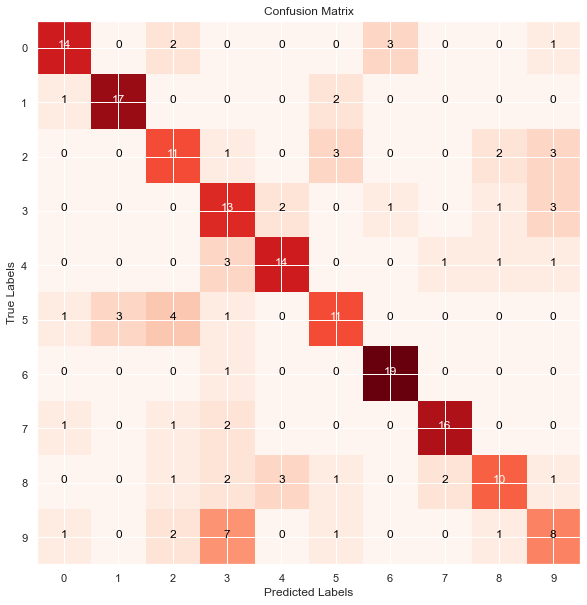

In [21]:
# Confusion Matrix
import itertools
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_class)

classes = range(0,10)
print(cnf_matrix)
plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Reds')
plt.title("Confusion Matrix")
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

<a id='cnn'></a>
## Convolutional Neural Network

In [22]:
# Checking the minimum and maximum values of X_train and X_test
print("The mininum of X_train is",X_train.min(),".")
print("The minimum of X_test is",X_test.min(),".")
print("The maximum of X_train is",X_train.max(),".")
print("The maximum of X_test is",X_test.max(),".")

The mininum of X_train is -4.972818914745953 .
The minimum of X_test is -4.421454239305414 .
The maximum of X_train is 4.501190051812428 .
The maximum of X_test is 3.2829396366006933 .


In [23]:
# Scale the X_test and X_train to be between 0 and 1 using the minimum value from above
for values in X_train:
  for i in range(len(values)):
    if values[i] < 0:
      values[i] = values[i]/(-5)
    if values[i] > 0:
      values[i] = values[i]/5

In [24]:
# Reshape X_train and X_test for the model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Building of the model
model_cnn = tf.keras.Sequential()

# Building of the different dense layers and Adding to the model

model_cnn.add(Conv1D(filters = 1024,
                kernel_size = 3,
                input_shape = (X_train.shape[1],1),
                padding="same",
                activation = 'relu'))

model_cnn.add(MaxPooling1D(pool_size = 2))

model_cnn.add(Conv1D(filters = 512,
                kernel_size = 3,
                padding="same",
                activation = 'relu'))

model_cnn.add(MaxPooling1D(pool_size = 2))

model_cnn.add(Conv1D(filters = 256,
                kernel_size = 3,
                padding="same",
                activation = 'relu'))

model_cnn.add(MaxPooling1D(pool_size = 2))

model_cnn.add(Conv1D(filters = 128,
                kernel_size = 3,
                padding="same",
                activation = 'relu'))

model_cnn.add(MaxPooling1D(pool_size = 2))

model_cnn.add(Conv1D(filters = 64,
                kernel_size = 3,
                padding="same",
                activation = 'relu'))

model_cnn.add(Flatten())

model_cnn.add(Dense(units = 10, activation = 'softmax'))

In [26]:
# Compiling the model 
model_cnn.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [27]:
# Fitting the model
model_cnn.fit(X_train, y_train,
          epochs = 30,
          batch_size = 32)

Epoch 1/30
25/25 [==============================] - 8s 235ms/step - loss: 2.3001 - accuracy: 0.1178
Epoch 2/30
25/25 [==============================] - 6s 234ms/step - loss: 2.2190 - accuracy: 0.1845
Epoch 3/30
25/25 [==============================] - 6s 223ms/step - loss: 1.9058 - accuracy: 0.3104
Epoch 4/30
25/25 [==============================] - 6s 252ms/step - loss: 1.7082 - accuracy: 0.3471
Epoch 5/30
25/25 [==============================] - 6s 248ms/step - loss: 1.6325 - accuracy: 0.4040
Epoch 6/30
25/25 [==============================] - 6s 248ms/step - loss: 1.5135 - accuracy: 0.4875
Epoch 7/30
25/25 [==============================] - 7s 270ms/step - loss: 1.4735 - accuracy: 0.4372
Epoch 8/30
25/25 [==============================] - 6s 231ms/step - loss: 1.3247 - accuracy: 0.5094
Epoch 9/30
25/25 [==============================] - 6s 240ms/step - loss: 1.2884 - accuracy: 0.5328
Epoch 10/30
25/25 [==============================] - 6s 230ms/step - loss: 1.1996 - accuracy: 0.5738

In [28]:
# Calculating the accuracy
test_loss, test_acc = model_cnn.evaluate(X_test, y_test)
print("The test accuracy is :",test_acc,".")

7/7 [==============================] - 0s 27ms/step - loss: 20.2079 - accuracy: 0.4100
The test accuracy is : 0.4099999964237213 .


In [29]:
# Predictions
from sklearn import metrics

y_pred = model_cnn.predict(X_test)
test_pred_class = y_pred.argmax(axis = 1)

print(metrics.classification_report(y_test, test_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.30      0.44        20
           1       0.88      0.35      0.50        20
           2       0.18      0.10      0.13        20
           3       0.29      0.55      0.38        20
           4       0.69      0.55      0.61        20
           5       0.16      0.35      0.22        20
           6       0.64      0.80      0.71        20
           7       0.77      0.50      0.61        20
           8       0.50      0.40      0.44        20
           9       0.17      0.20      0.19        20

    accuracy                           0.41       200
   macro avg       0.51      0.41      0.42       200
weighted avg       0.51      0.41      0.42       200



[[ 6  0  0  0  1  5  3  0  0  5]
 [ 0  7  4  0  0  4  0  0  4  1]
 [ 0  0  2  0  0 12  1  1  1  3]
 [ 0  0  0 11  0  3  2  0  0  4]
 [ 0  0  0  7 11  0  0  0  1  1]
 [ 0  1  4  5  0  7  0  0  2  1]
 [ 1  0  0  1  0  0 16  0  0  2]
 [ 0  0  0  4  1  4  0 10  0  1]
 [ 0  0  1  5  2  2  0  1  8  1]
 [ 0  0  0  5  1  6  3  1  0  4]]


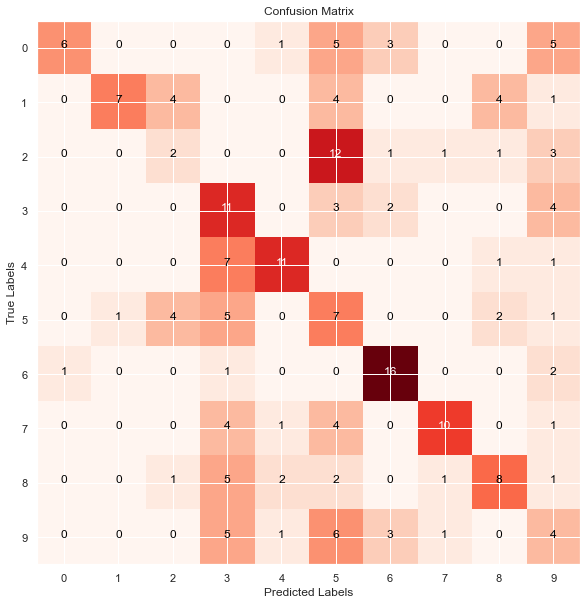

In [30]:
# Confusion Matrix
import itertools
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_class)

classes = range(0,10)
print(cnf_matrix)
plt.figure(figsize=(10,10))

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Reds')
plt.title("Confusion Matrix")
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [58]:
cv5 = KFold(n_splits=5, random_state=111, shuffle = True)

for clf, label in zip([clf1, clf2, clf3, clf4,vclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Logistic Regression',
                       'SVC',
                       'Voting Classifier']):

    scores = cross_validate(clf, X_train, y_train, cv=cv5)
    #print(scores.keys())
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" 
          % (label, scores['test_score'].mean(), scores['test_score'].std()))

[KNN]: 
 Accuracy: 0.61 (+/- 0.04)
[Random Forest]: 
 Accuracy: 0.62 (+/- 0.03)
[Logistic Regression]: 
 Accuracy: 0.59 (+/- 0.03)
[SVC]: 
 Accuracy: 0.67 (+/- 0.02)
[Voting Classifier]: 
 Accuracy: 0.68 (+/- 0.03)


<a id='cnn_raw'></a>
# Appendix 3 : CNN on raw music files 

In this part we have made an attempt to see what would be the result of training a CNN directly on the soundwave extracted of the music file instead of the features of our two previous datasets.

Here we can see how a whole music file looks like when extracted and visualized with Python's librosa library:

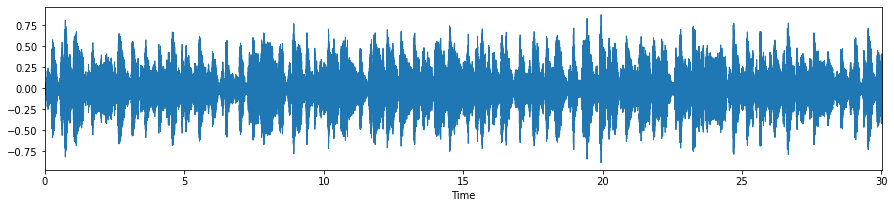

In [ ]:
file = '/content/gdrive/My Drive/projet_musique/musics/genres/blues/blues.00000.wav'
wav, sr = librosa.load(file)

plt.figure(figsize=(15,3))
librosa.display.waveplot(wav,sr=sr);


In [ ]:
filepath = "/content/gdrive/My Drive/projet_musique/musics/genres/"

list_genres = [f for f in os.listdir(path=filepath) if os.path.isdir(filepath+f)]

target = []
sample_points = 66000
raw_music_df = pd.DataFrame()

for j,genre in enumerate(list_genres):
    print(genre)
    list_songs_per_genre = [filepath+genre+'/'+f for f in os.listdir(path=(filepath+genre+'/'))]
    for i,file in enumerate(list_songs_per_genre):  
        target.append(genre)
        wav, sr = librosa.load(file)
        wav_reshaped = wav[:sample_points].reshape(1,sample_points)
        wav_df = pd.DataFrame(wav_reshaped)
        raw_music_df = raw_music_df.append(wav_df,ignore_index=True)
                
print('Done')

country
blues
classical
disco
reggae
metal
hiphop
pop
jazz
rock
Done


In [ ]:
raw_music_df.shape

(1000, 66000)

In [ ]:
target = pd.DataFrame(target, columns=['label'])

## Preparing the data

In [ ]:
target = target.label
data = raw_music_df

In [ ]:
# Encode the label classes using LabelEncoder
encoder = preprocessing.LabelEncoder()
target = encoder.fit_transform(target)

## Division between train and test sets

In [ ]:
# Split for the train and test datasets
X_train, X_test, y_train, y_test = train_test_split (data, target,
                                                    test_size = 0.2 ,
                                                    random_state = 42 ,
                                                    stratify = target)

In [ ]:
# One-hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
#y_val = np_utils.to_categorical(y_val)

In [ ]:
X_train = X_train.to_numpy().reshape((-1,sample_points,1))
X_test = X_test.to_numpy().reshape((-1,sample_points,1))
#X_val = X_val.to_numpy().reshape((-1,sample_points,1))

## Building the architecture of the CNN

In [ ]:
model = Sequential()

first_layer = Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sample_points,1))
second_layer = MaxPooling1D(pool_size=2)
third_layer = Conv1D(filters=8, kernel_size=20, activation='relu')
fourth_layer = MaxPooling1D(pool_size=2)
conv_layer = Conv1D(filters=16, kernel_size=3, activation='relu')
pool_layer = MaxPooling1D(pool_size=2)
sixth_layer = Flatten()
seventh_layer = Dense(units=64,activation='relu')
output_layer = Dense(units=10,activation = 'softmax')

model.add(first_layer)
model.add(second_layer)
model.add(Dropout(rate=0.8))
model.add(third_layer)
model.add(fourth_layer)
model.add(Dropout(rate=0.8))
model.add(conv_layer)
model.add(pool_layer)
model.add(Dropout(rate=0.6))
model.add(sixth_layer)
model.add(seventh_layer)
model.add(output_layer)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 65998, 32)         128       
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 32999, 32)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 32999, 32)         0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 32980, 8)          5128      
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 16490, 8)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16490, 8)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 16488, 16)        

## Training the model 

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

training_history = model.fit(X_train,y_train,
                             validation_split=0.2,
                             epochs = 10,
                             batch_size = 50)

Epoch 1/10
13/13 [==============================] - 110s 8s/step - loss: 4.5016 - accuracy: 0.0931 - val_loss: 2.3018 - val_accuracy: 0.1312
Epoch 2/10
13/13 [==============================] - 110s 9s/step - loss: 2.3095 - accuracy: 0.2097 - val_loss: 2.3013 - val_accuracy: 0.1312
Epoch 3/10
13/13 [==============================] - 109s 8s/step - loss: 2.2683 - accuracy: 0.1926 - val_loss: 2.3006 - val_accuracy: 0.1312
Epoch 4/10
13/13 [==============================] - 109s 8s/step - loss: 2.2594 - accuracy: 0.1761 - val_loss: 2.2998 - val_accuracy: 0.1312
Epoch 5/10
13/13 [==============================] - 108s 8s/step - loss: 2.2474 - accuracy: 0.1892 - val_loss: 2.2988 - val_accuracy: 0.1312
Epoch 6/10
 6/13 [============>.................] - ETA: 57s - loss: 2.1997 - accuracy: 0.2499 

## Result of the training

In [ ]:
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

In [ ]:
test_pred = model.predict(X_test)

test_pred_class = np.argmax(test_pred,axis=1)
y_test_class = np.argmax(y_test,axis=1)

print(metrics.classification_report(y_test_class,test_pred_class))

              precision    recall  f1-score   support

           0       0.05      0.05      0.05        20
           1       0.70      0.80      0.74        20
           2       0.22      0.10      0.14        20
           3       0.06      0.05      0.05        20
           4       0.14      0.20      0.17        20
           5       0.20      0.10      0.13        20
           6       0.15      0.30      0.20        20
           7       0.11      0.20      0.14        20
           8       0.27      0.15      0.19        20
           9       0.17      0.05      0.08        20

    accuracy                           0.20       200
   macro avg       0.21      0.20      0.19       200
weighted avg       0.21      0.20      0.19       200



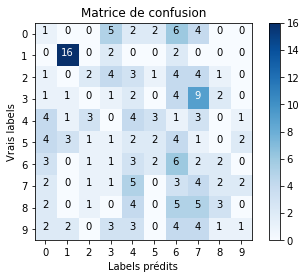

In [ ]:
# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_class, test_pred_class)

classes = range(0,10)

plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

The result is disappointing so far. The explanation could be that the waveshapes may depend on factors external to the music style, such as sound compression. Also, as the set of music files is not so big at all a CNN can typically overfit a lot on such a training set. So we have explored further and found other ideas to find still better models. The overfitting could be reduced a lot by segmenting every music file in 10 parts that would be used each as separate observations. We could also use the diagram of the mfccs instead of the waveshapes in order to rely on information that would be more specific to the musi genre. This approach could be the subject of further developments to this project.